In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
consumer_key = "2xqB6OIO7SsrXBVzSJQ7S3sOB"
consumer_secret = "weCvVtReKAN6SyxKB8oGcUWgeFHn7rV6FAnNle12mWASHyzypm"
access_token = "1023627089117757440-1tl8W5wMbVIt9vqwKp7hfd610aRNJR"
access_token_secret = "nVQLNLaCbskZhclTM9b3qbFtU3b94gt0ZdPQx5Yf0ZNFE"

In [5]:
# API Setup
auth_stuff = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth_stuff.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth_stuff, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_source = ["FoxNews","CNN","BBCWorld","CBSNews","nytimes"]

In [6]:
# Search Profiles
profile_stuff = ("@BBC","@CBSNews","@CNN","@FoxNews", "@nytimes")

# min max
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

In [8]:
# sentiment setup
sentiment_array = []


oldest_tweet = ""

# loop through profiles
for target in profile_stuff:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 times (total of 1000 tweets)
    for x in range(10):

        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent")

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers and
                tweet["user"]["statuses_count"] > min_tweets and
                tweet["user"]["statuses_count"] < max_tweets and
                tweet["user"]["friends_count"] < max_following and
                    tweet["user"]["lang"] == lang):

                
                compound_stuff = analyzer.polarity_scores(tweet["text"])["compound"]
                positive_stuff = analyzer.polarity_scores(tweet["text"])["pos"]
                neutral_stuff = analyzer.polarity_scores(tweet["text"])["neu"]
                negative_stuff = analyzer.polarity_scores(tweet["text"])["neg"]

               
                compound_list.append(compound_stuff)
                positive_list.append(positive_stuff)
                negative_list.append(negative_stuff)
                neutral_list.append(neutral_stuff)
             
    sentiment = {"User": target,
                 "Date": tweet["created_at"],
                 "Compound": [np.mean(compound_list)],
                 "Positive": np.mean(positive_list),
                 "Neutral": np.mean(negative_list),
                 "Negative": np.mean(neutral_list),
                 "Tweet Count": len(compound_list)}

    
    print(sentiment)
    print("")

{'User': '@BBC', 'Date': 'Tue Dec 11 01:24:22 +0000 2018', 'Compound': [0.05579166666666667], 'Positive': 0.0255, 'Neutral': 0.007249999999999999, 'Negative': 0.9672499999999999, 'Tweet Count': 120}

{'User': '@CBSNews', 'Date': 'Tue Dec 11 01:47:10 +0000 2018', 'Compound': [0.13108809523809525], 'Positive': 0.13854761904761903, 'Neutral': 0.10123809523809525, 'Negative': 0.7602142857142857, 'Tweet Count': 420}

{'User': '@CNN', 'Date': 'Tue Dec 11 01:52:55 +0000 2018', 'Compound': [0.020703921568627447], 'Positive': 0.11290196078431372, 'Neutral': 0.08221568627450981, 'Negative': 0.8049215686274511, 'Tweet Count': 510}

{'User': '@FoxNews', 'Date': 'Tue Dec 11 01:53:31 +0000 2018', 'Compound': [-0.07575203703703703], 'Positive': 0.07015370370370369, 'Neutral': 0.0974574074074074, 'Negative': 0.8324055555555555, 'Tweet Count': 540}

{'User': '@nytimes', 'Date': 'Tue Dec 11 01:51:58 +0000 2018', 'Compound': [-0.0074860724233983215], 'Positive': 0.06155988857938718, 'Neutral': 0.06637883

In [9]:
# Convert sentiment to DataFrame
twitter_sentiment = pd.DataFrame.from_dict(sentiment)
twitter_sentiment

,User,Date,Compound,Positive,Neutral,Negative,Tweet Count
0,@nytimes,Tue Dec 11 01:51:58 +0000 2018,-0.007486,0.06156,0.066379,0.872061,359


In [10]:
#Export to CSV
twitter_sentiment.to_csv("twitter_things.csv", index=False)

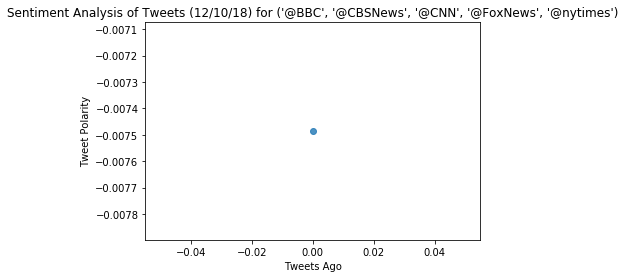

In [12]:
# plot
plt.plot(np.arange(len(twitter_sentiment["Compound"])),
         twitter_sentiment["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), profile_stuff))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

In [13]:
#Group By 
tweet_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

#View the polarities
pd.DataFrame(tweet_polarity)

NameError: name 'tweet_df' is not defined

In [ ]:

# Store all polarities in a tuple 
tweets_polarity = (tweet_df_polarity["BBC News (World)"],
                       tweet_df_polarity["CBS News"],
                       tweet_df_polarity["CNN"],
                       tweet_df_polarity["Fox News"],
                       tweet_df_polarity["The New York Times"])

# Generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color="orange")
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color="red")
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color="purple")
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color="pink")
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color="yellow")

# Generate labels for each news source
def autolabelpos(rects):
   # attach some text labels
   for rect in rects:
       height = rect.get_height()
       ax.text(rect.get_x() + rect.get_width()/2., 1*height, '+%.2f' % float(height)),ha='center', va='bottom'
def autolabelneg(rects):
    attach some text labels
   for rect in rects:
       height = rect.get_height()
       ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
               '-%.2f' % float(height),
               ha='center', va='bottom')